In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pywt # python library for wavelet transformation

In [3]:
# Compress 'x' i times and get a [x.size / 2**i] size data
# e.g. using com_iterative(x, 3) on x which contains 256 float numbers,
#      we'll have a compressed [256 / 2**3] = 32 float numbers
def com_iterative(x, i):
    for k in range(i):
        compressed_x, _ = pywt.dwt(x, 'db1')
        x = compressed_x
    return x
# reconstruction of data set 'y' to [y.original_size * 2**i]
def rec_iterative(y, i):
    tmp = y
    for k in range(i):
        reconstructed_y = pywt.idwt(tmp, None, 'db1')
        tmp = reconstructed_y
    return reconstructed_y

# Interface functions to encode/decode easily
def compress_to_size(x, size):
    if size == 128 or size == 64 or size == 32:
        #size = size/4
        return com_iterative(x, int(math.log(x.shape[0]/size, 2)))
    else:
        print("compress_to_size(x,size): size is not valid.")
        import os
        os.system('pause')

def decompress1024(y, size):
    return rec_iterative(y, int(math.log(256/y.shape[0], 2)))

In [11]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))
from sklearn.metrics import mean_squared_error
from math import sqrt
def rms(x,y):
    return sqrt(mean_squared_error(x, y))

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 10]

In [6]:
import numpy as np
import struct
filename_seismic_query = 'seismic-query_size100_len256_znorm.bin'
with open(filename_seismic_query, 'rb') as in_file:
    time_series_seismic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

In [7]:
i = 1
t = range(256)
x = time_series_seismic_query[i,]
x1 = compress_to_size(x, 128)
y1 = decompress1024(x1, 256)

In [8]:
# plt.plot(t,x,t,y1)
euc_dist(x,y1)

11.4525839693859

## Speed test 1024 bytes (256 floats) -> 128 bytes (32 floats)

In [12]:
def clean_data(x):
    min_value = -5
    max_value = 5
    x[x < min_value] = min_value
    x[x > max_value] = max_value
    return x

In [27]:
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic_ori = np.array(struct.unpack('f' * 50000 * 256, in_file.read()))

# time_series_synthetic = clean_data(time_series_synthetic_ori)
error = 0
import time
start_time = time.time()

# time_series_synthetic = (time_series_synthetic * 20).round()

# compression
x = time_series_synthetic
for k in range(1):
    compressed_x, _ = pywt.dwt(x, 'db1')
    x = compressed_x
x1 = x

# decompression
y = x1
for k in range(1):
    reconstructed_y = pywt.idwt(y, None, 'db1')
    y = reconstructed_y
y1 = y

# y1 = y1 / 20

# print("--- %s seconds ---" % (time.time() - start_time))
print(rms(time_series_synthetic_ori,y1))

0.10202687809031044


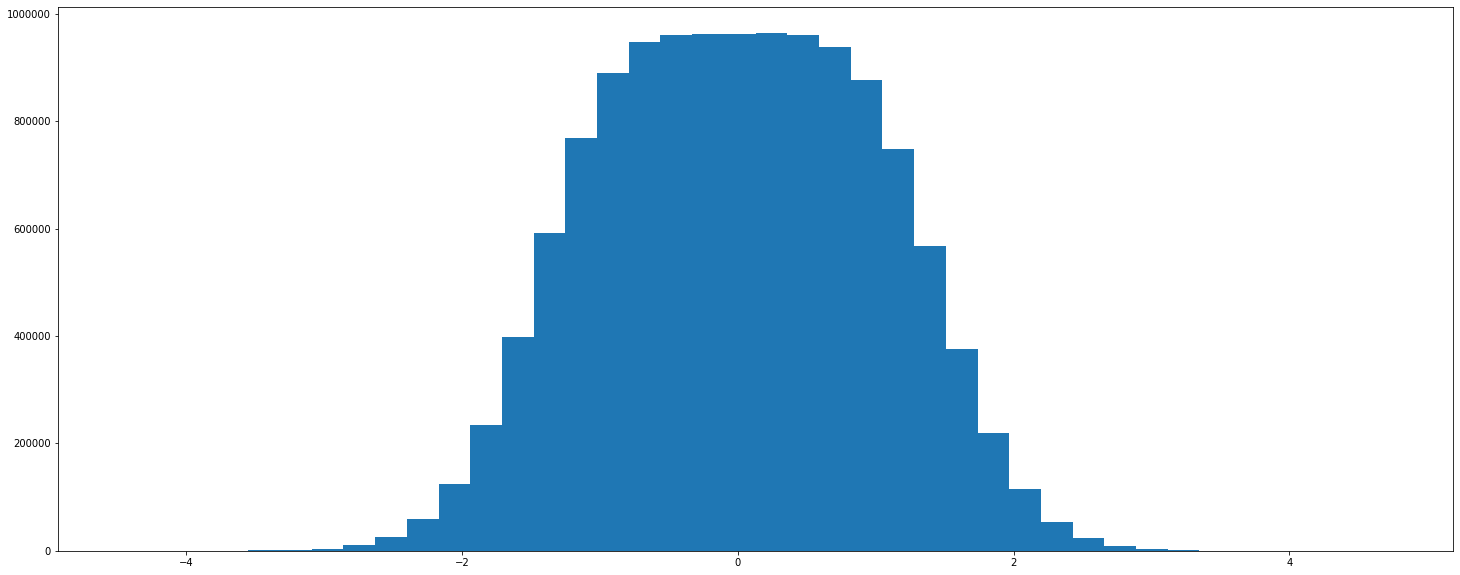

In [30]:
import matplotlib.pyplot as plt
p1 = plt.hist(time_series_synthetic, bins=40)

In [23]:
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

time_series_synthetic = clean_data(time_series_synthetic)
error = 0
import time
start_time = time.time()

for i in range(50000):
# t = range(256)
    x = time_series_synthetic[i,]
    x1 = compress_to_size(x, 64)
    y1 = decompress1024(x1, 256)
    error += euc_dist(time_series_synthetic_ori[i],y1)
    
print("--- %s seconds ---" % (time.time() - start_time))
print(error/50000)

--- 5.1154465675354 seconds ---
2.4065547824369355


In [24]:
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

time_series_synthetic = clean_data(time_series_synthetic)
error = 0
import time
start_time = time.time()

for i in range(50000):
# t = range(256)
    x = time_series_synthetic[i,]
    x1 = compress_to_size(x, 32)
    y1 = decompress1024(x1, 256)
    error += euc_dist(time_series_synthetic_ori[i],y1)
    
print("--- %s seconds ---" % (time.time() - start_time))
print(error/50000)

--- 6.796142101287842 seconds ---
3.4711128933642046
